In [1]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(sklearn.__version__)

1.2.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

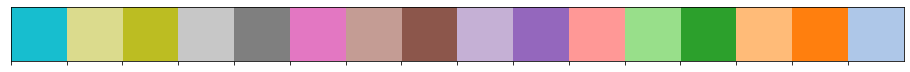

In [4]:
colors = sns.color_palette("tab20_r", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=Ev8YbxPu_bQ
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

1 - It's the operation consisting in grouping points together based on several criterias, depending on the method used to build groups

2 - Steps :
--> Feature extraction and selection: extract and select the most representative features from the original data set;
 
--> Clustering algorithm design: design the clustering algorithm according to the characteristics of the problem;

--> Result evaluation: evaluate the clustering result and judge the validity of algorithm;

--> Result explanation: give a practical explanation for the clustering result;

On regroupe selon 2 méthodes : Distance (différentes Normes) ou Similitude (Exemple : Hamming similarity)

3 - Silhouette coefficient

When we evaluate our cluster we need some methods. We have two main types :
--> Internal

--> External
Silhouette is an Internal algorithm :
Evaluate the clustering result based on the average distance between a data point and other data points in the same cluster and average distance among different clusters

As external we find the f1-score, precision etc which validate the clusturing on an external dataset (X_test)

4 - Differences

Internal : The internal evaluation takes the internal data to test the validity of algorithm. It, however, can’t absolutely judge which algorithm is better when the scores of two algorithms are not equal based on the internal evaluation indicators

External : The external evaluation, which is called as the gold standard for testing method, takes the external data to test the validity of algorithm. However, it turns out that the external evaluation is not completely correct recently [6]. There are six common used external evaluation indicators, summarized in Table 

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [5]:
df = pd.read_csv("../data/bank-full.csv", sep=";")#, na_values="unknown")
dff = df.copy()

Print a summary of the data as well as the first 5 rows.

In [6]:
dff.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
dff.describe

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

### Numerical Data

In [8]:
dff.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
numerical_features = ["age", "balance", "duration", "campaign", "pdays", "previous"]
dff_num = dff[numerical_features]
dff_num.head()

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0


Plot histograms of features

### Handling Nan

In [10]:
dff_num.isna().value_counts()

age    balance  duration  campaign  pdays  previous
False  False    False     False     False  False       45211
dtype: int64

### Standardizaion

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [13]:
numerical_features = ["age", "balance", "duration", "campaign", "pdays", "previous"]

num_pipeline = Pipeline([
     ('std_scaler', StandardScaler()), # try commenting in this line and running fit_transform with and without it
 ])


transformer = ColumnTransformer(
    transformers = [
        ("num", num_pipeline, numerical_features),
    ],
    remainder='passthrough'
)

In [14]:
df_norm = pd.DataFrame(transformer.fit_transform(dff_num), columns=dff_num.columns)
df_norm

,age,balance,duration,campaign,pdays,previous
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940


### Visualization

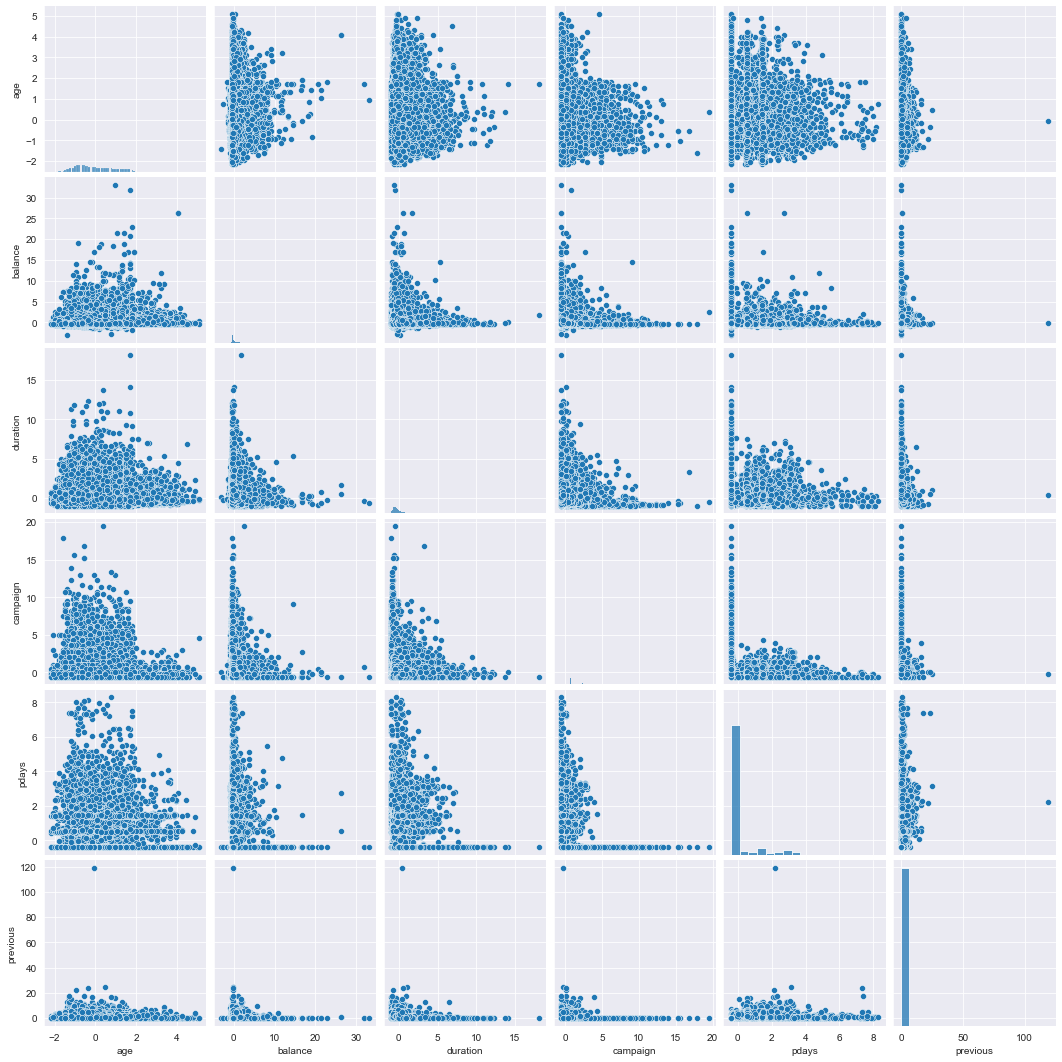

In [15]:
sns.pairplot(df_norm)

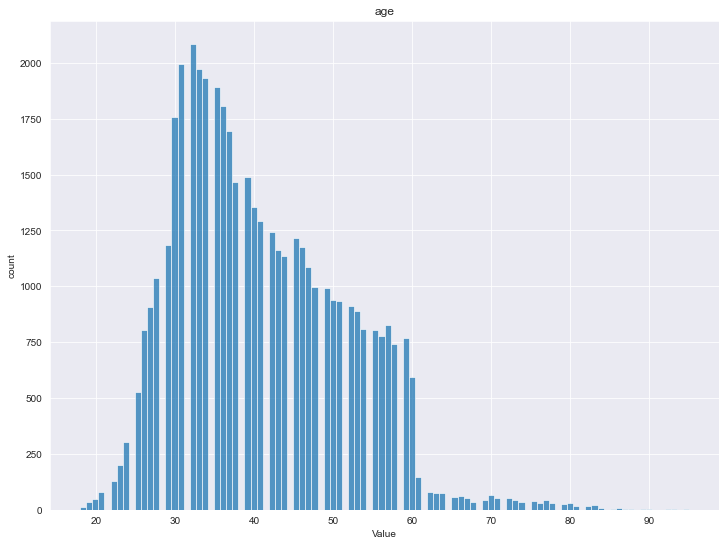

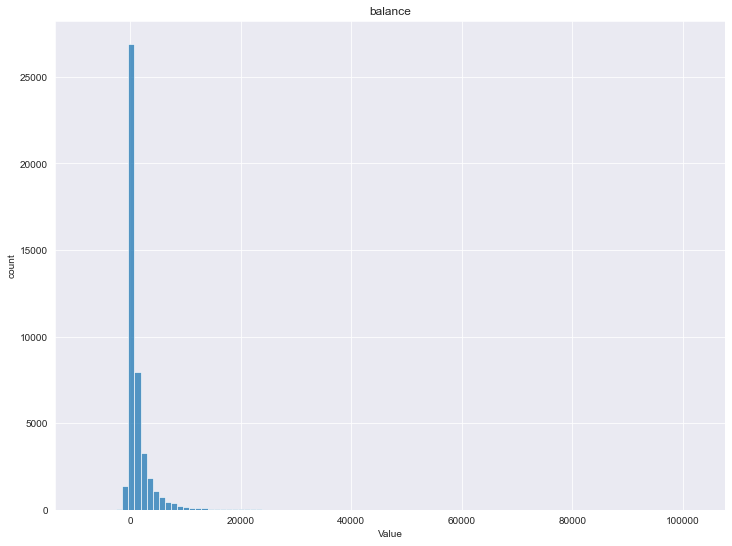

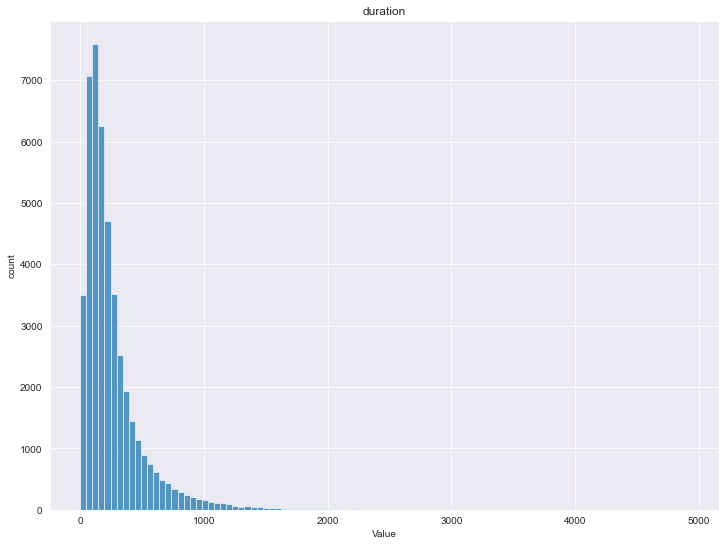

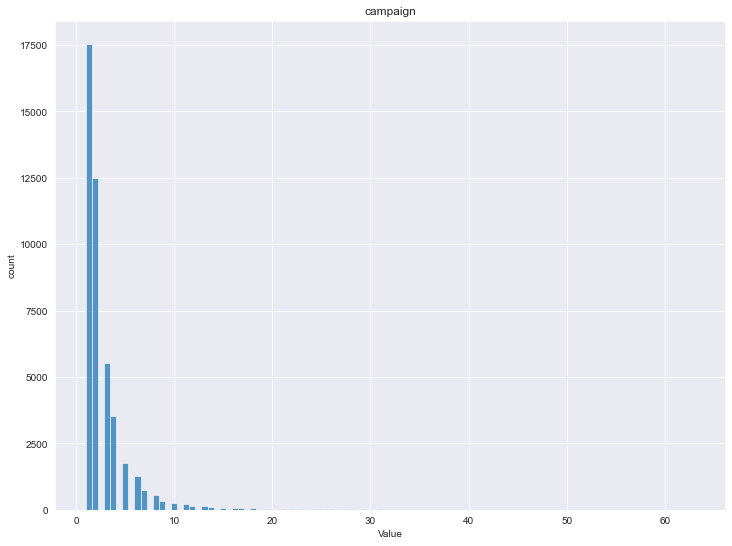

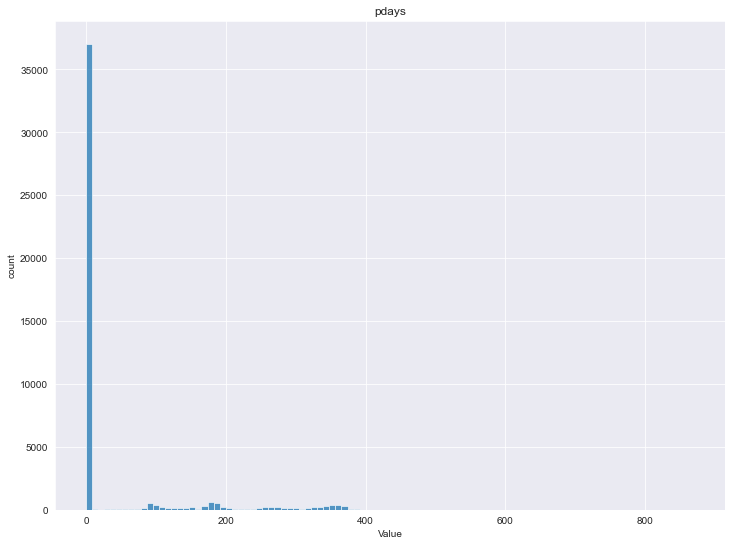

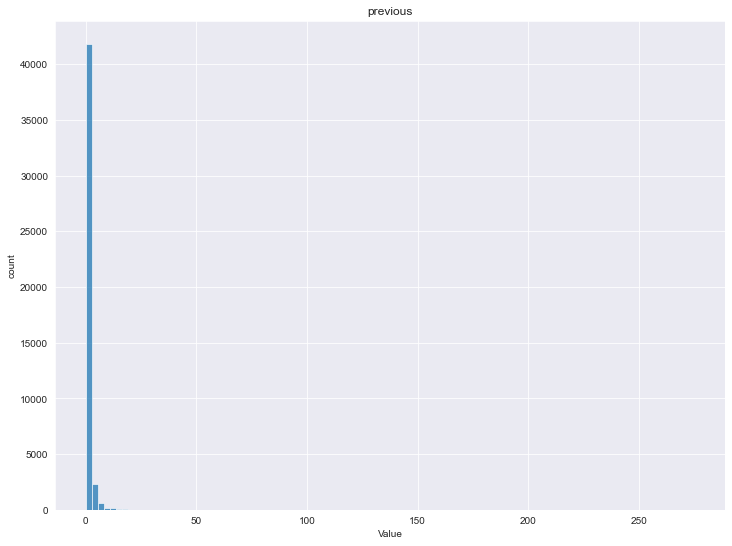

In [16]:
for col in dff_num.columns:
    # Create a histogram of the values in the column using Seaborn
    fig, ax = plt.subplots(figsize=(12,9))
    sns.histplot(data=dff_num, x=col, ax=ax, bins=100)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('count')
    plt.show()

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


1 - A centroid is a point that represents the center of a group of points or objects in a given space. It is often used in data science and machine learning as a way to describe the center of a cluster of data points.

2 - Average distance of the group to the point. Should be a point where this average is minimum as possible

3 - Yes a bit of an idea

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [17]:
from sklearn.cluster import KMeans

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [18]:
df_norm.head()

,age,balance,duration,campaign,pdays,previous
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.25194


In [19]:
k = 5

kmeans = KMeans(
    n_clusters=k,
    max_iter=300, 
    tol=0.0001,
    verbose=0,
    random_state=0,
    copy_x=True, 
    algorithm='lloyd'
)

kmeans.fit(df_norm)

/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

Print the centroids obtained

In [20]:
centroids = kmeans.cluster_centers_

for i, el in enumerate(centroids):
    print("------------------------")
    print(f"Centroids number {i+1} :")
    print(el)

------------------------
Centroids number 1 :
[-0.1478871  -0.01115287 -0.09584581 -0.20779387  2.23043463  1.29939325]
------------------------
Centroids number 2 :
[-0.07020924 -0.09608042 -0.45022605  3.91803587 -0.39990263 -0.24061503]
------------------------
Centroids number 3 :
[-0.0640937   0.04141878  2.57438731 -0.10845793 -0.25973955 -0.15715421]
------------------------
Centroids number 4 :
[-0.64461864 -0.1503633  -0.22260249 -0.15660623 -0.37507066 -0.22017418]
------------------------
Centroids number 5 :
[ 1.10006001  0.2405725  -0.23549709 -0.10652149 -0.32632991 -0.1850341 ]


Print the cluster labels assigned to each point

In [21]:
labels = kmeans.labels_
print(len(labels))

45211


In [22]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_norm.columns)
centers

,age,balance,duration,campaign,pdays,previous
0,-0.147887,-0.011153,-0.095846,-0.207794,2.230435,1.299393
1,-0.070209,-0.096080,-0.450226,3.918036,-0.399903,-0.240615
2,-0.064094,0.041419,2.574387,-0.108458,-0.259740,-0.157154
3,-0.644619,-0.150363,-0.222602,-0.156606,-0.375071,-0.220174
4,1.100060,0.240573,-0.235497,-0.106521,-0.326330,-0.185034


### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
pca.fit(df_norm)
df_pca = pd.DataFrame(pca.transform(df_norm), columns=["PC1", "PC2"])
df_pca_center = pd.DataFrame(pca.transform(centers), columns=["PC1", "PC2"])

In [25]:
index_list = df_pca[df_pca['PC1'] > 70].index.tolist()

In [26]:
df_pca.shape

(45211, 2)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

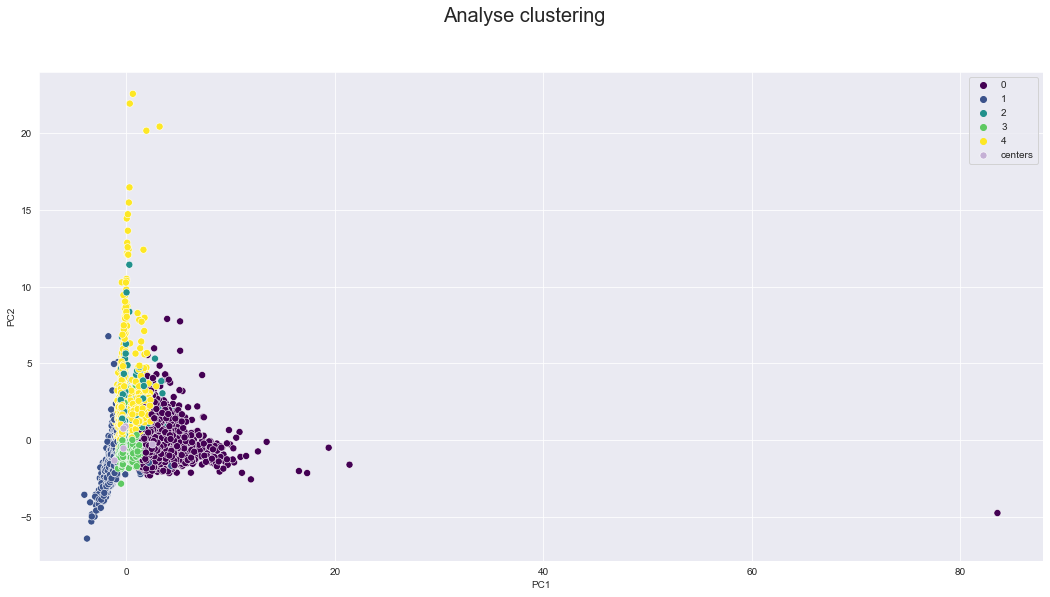

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(18,9))
fig.suptitle("Analyse clustering", fontsize=20)

labels=kmeans.labels_
sns.scatterplot(
    ax=ax,
    x=df_pca["PC1"], 
    y=df_pca["PC2"], 
    hue=labels, 
    palette='viridis',
    s=50,
)
sns.scatterplot(
    ax=ax,
    x=df_pca_center["PC1"], 
    y=df_pca_center["PC2"], 
    palette='viridis',
    s=50,
    label="centers",
    color=colors[8],
)

In [40]:
from sklearn.manifold import TSNE

In [46]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(df_norm)

/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


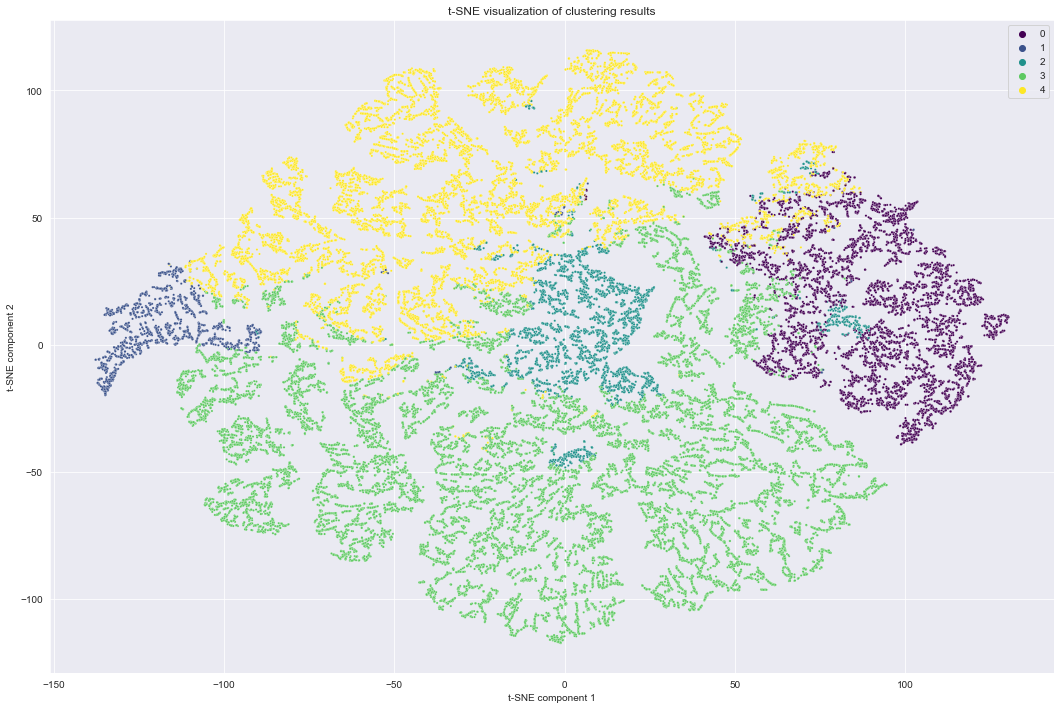

In [51]:
fig, ax = plt.subplots(figsize=(18,12))
sns.scatterplot(
    data_tsne[:, 0], 
    data_tsne[:, 1], 
    hue=labels,
    s=5,
    palette='viridis'
)
plt.title("t-SNE visualization of clustering results")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [28]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 146856.82891395775


**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [44]:
from sklearn.metrics import silhouette_score

In [52]:
score = silhouette_score(df_norm, kmeans.labels_)
score

0.2987312776435566

You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [55]:
inertia_list = []
silhouette_list = []
k_list = []

for n in range(2,30,1):
    print(f"Computing... {n}")
    k = n
    kmeans = KMeans(
        n_clusters=k,
        max_iter=300, 
        tol=0.0001,
        verbose=0,
        random_state=0,
        copy_x=True, 
        algorithm='lloyd'
    )
    
    kmeans.fit(df_norm)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_norm, kmeans.labels_)
    
    inertia_list.append(inertia)
    silhouette_list.append(silhouette)
    k_list.append(k)
    

Computing... 2


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 3


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 4


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 5


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 6


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 7


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 8


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 9


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 10


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 11


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 12


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 13


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 14


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 15


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 16


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 17


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 18


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 19


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 20


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 21


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 22


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 23


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 24


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 25


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 26


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 27


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 28


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing... 29


/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


What is the optimal number of clusters that you obtained?

*Answer here*

For n_clusters = 2 The average silhouette_score is : 0.20342679584498097
For n_clusters = 3 The average silhouette_score is : 0.20660931547930775
For n_clusters = 4 The average silhouette_score is : 0.2660106552720157
For n_clusters = 5 The average silhouette_score is : 0.28777025397813866
For n_clusters = 6 The average silhouette_score is : 0.3083820254196344
For n_clusters = 8 The average silhouette_score is : 0.3074481879598425
For n_clusters = 9 The average silhouette_score is : 0.290338938493655
For n_clusters = 10 The average silhouette_score is : 0.2993690245398187
For n_clusters = 12 The average silhouette_score is : 0.2997056613258796
For n_clusters = 14 The average silhouette_score is : 0.280460343006003
For n_clusters = 15 The average silhouette_score is : 0.2705038925026135
For n_clusters = 16 The average silhouette_score is : 0.27054387955051273
For n_clusters = 18 The average silhouette_score is : 0.2381682717782851
For n_clusters = 20 The average silhouette_score is : 0.

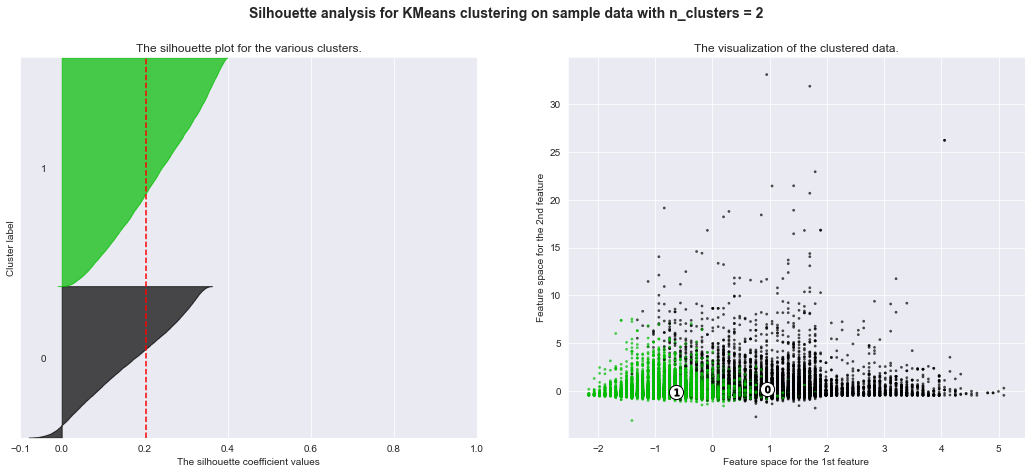

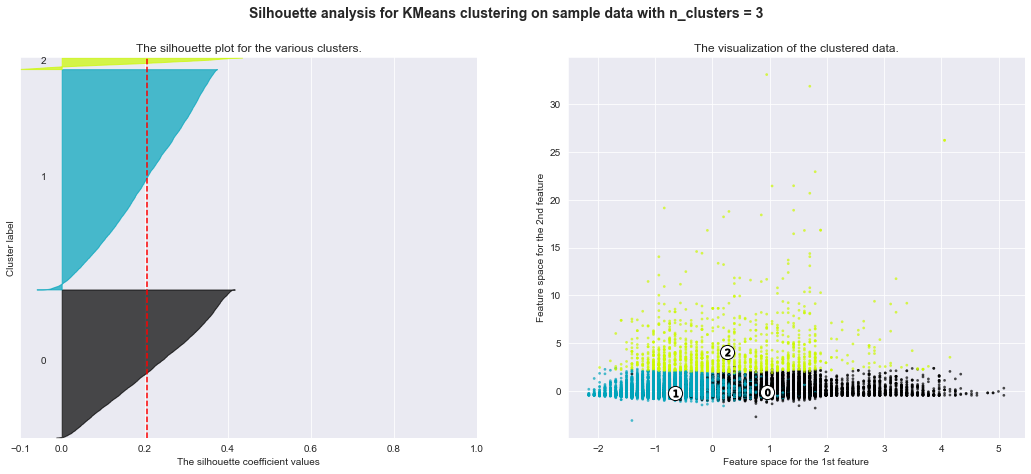

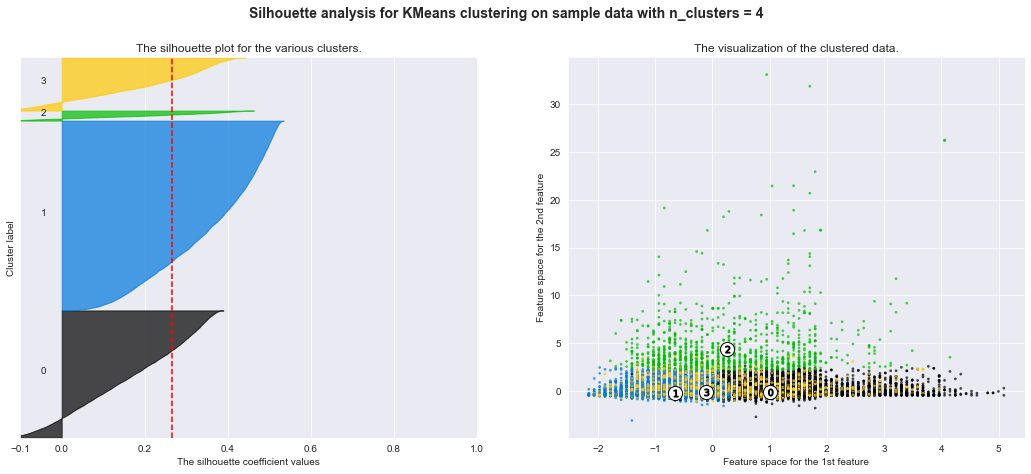

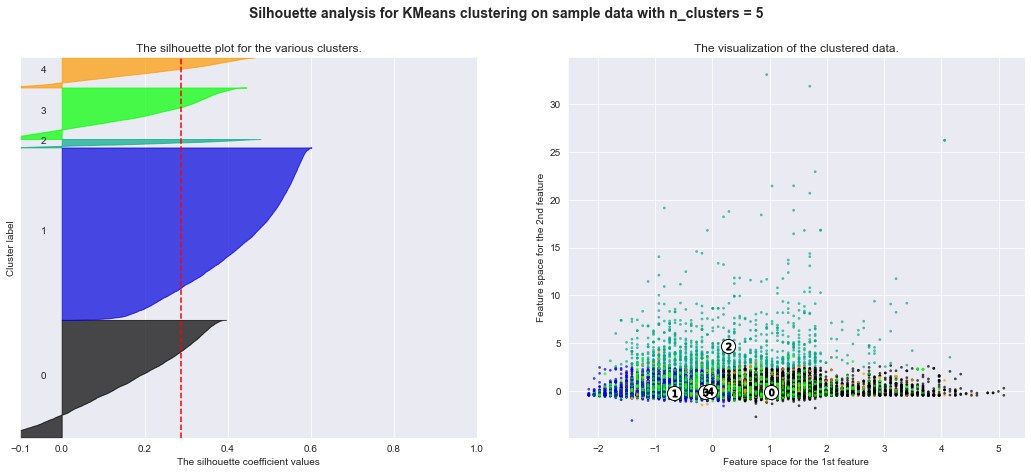

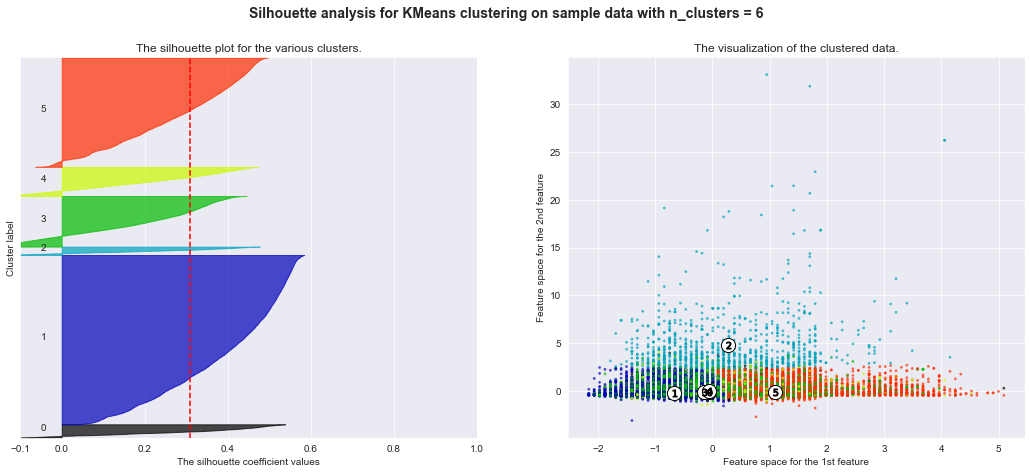

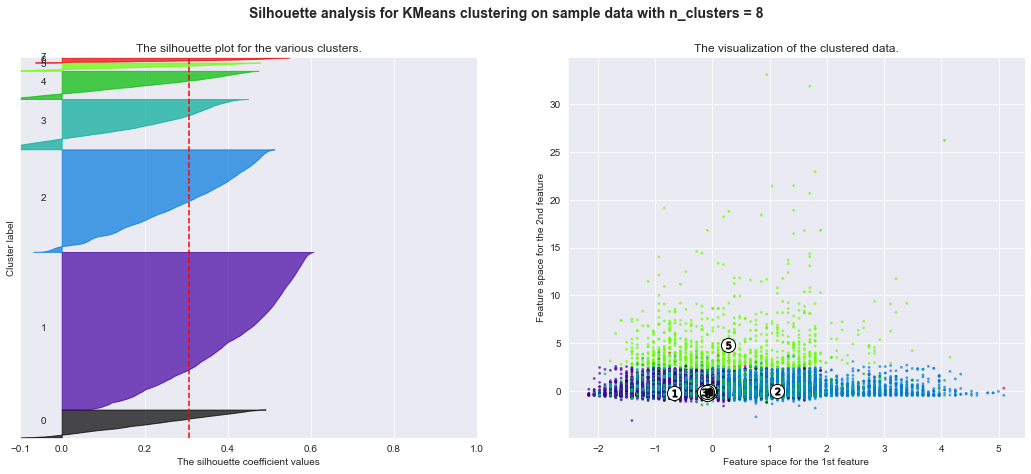

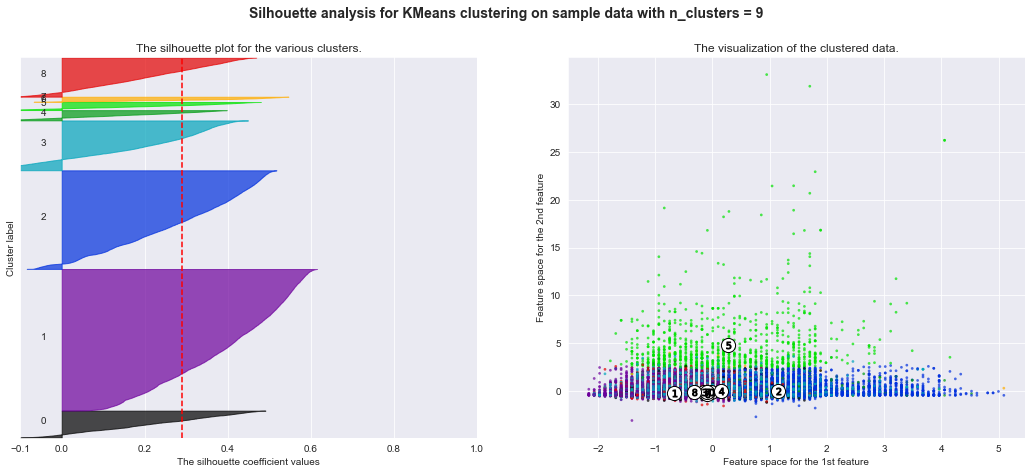

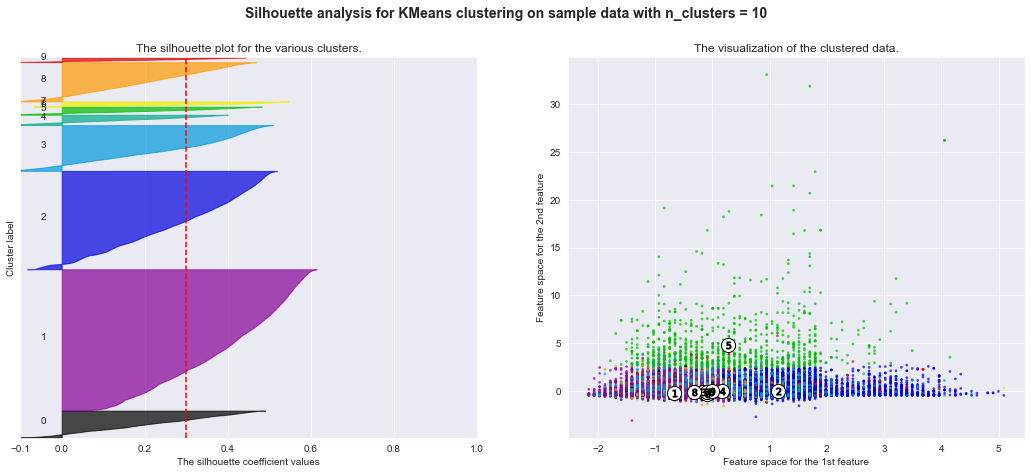

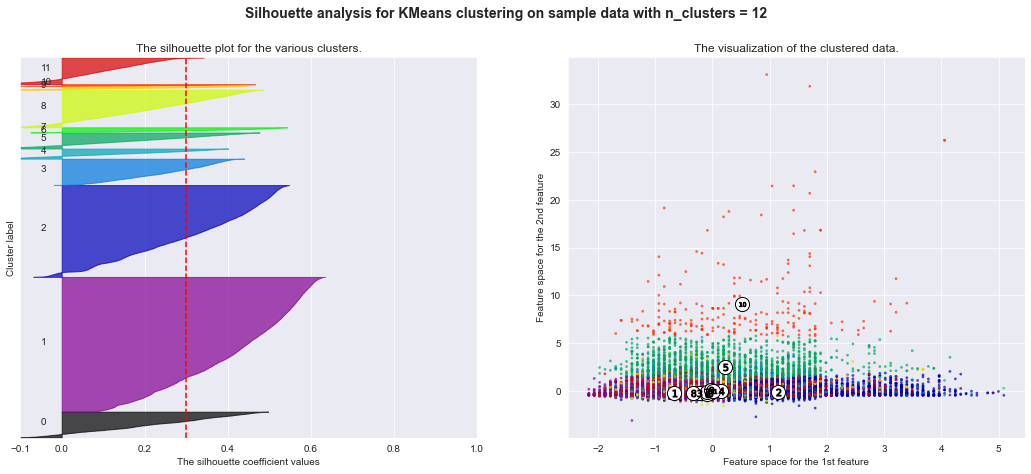

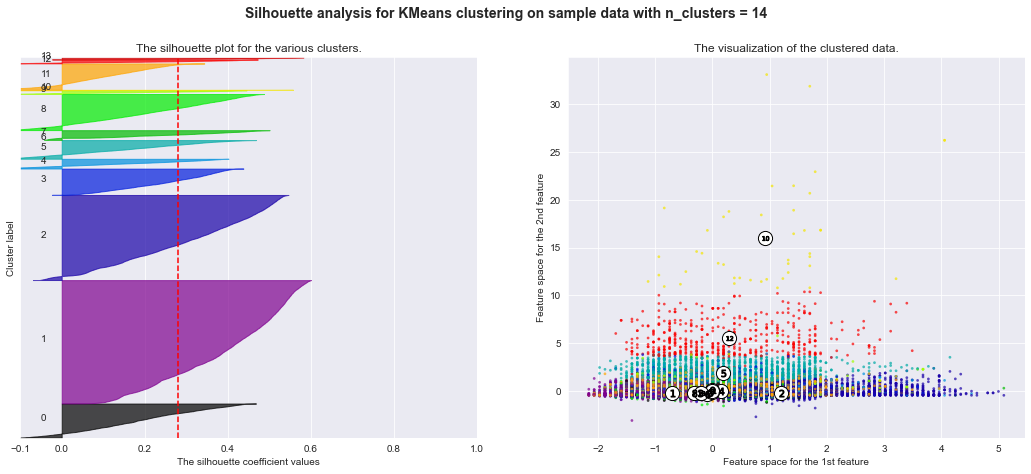

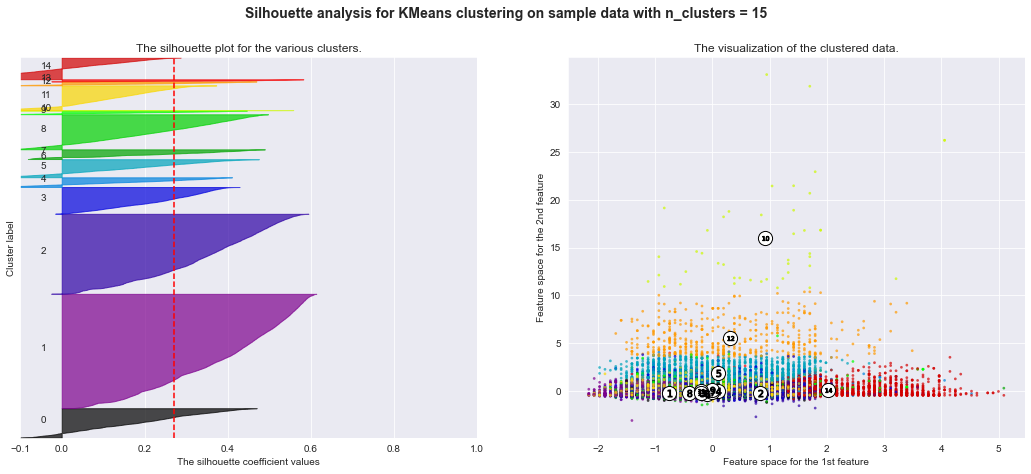

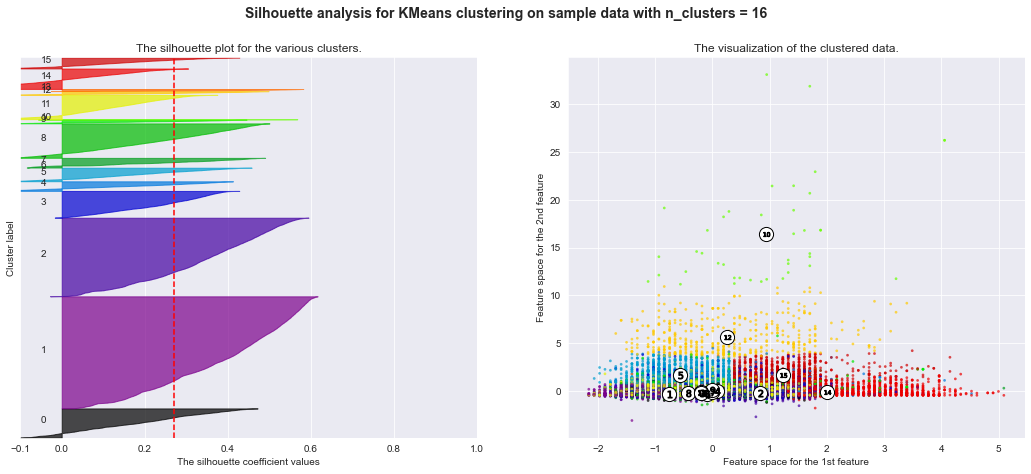

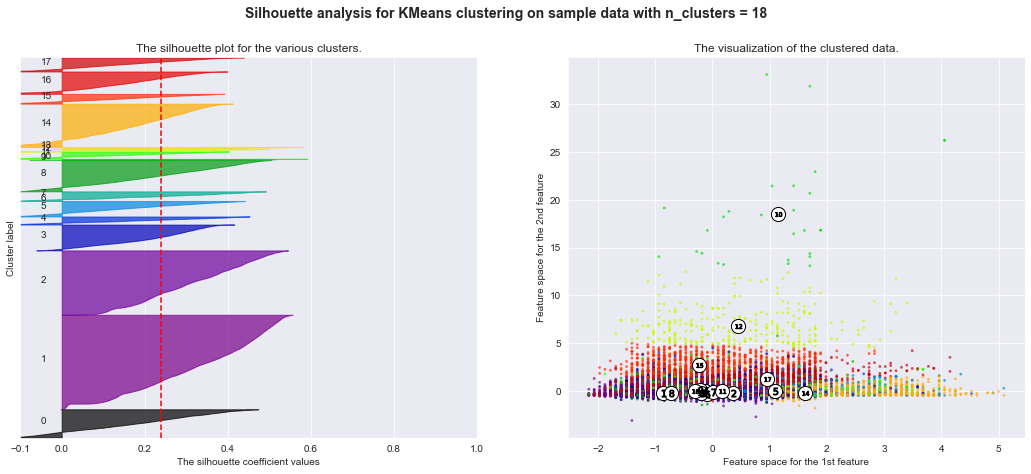

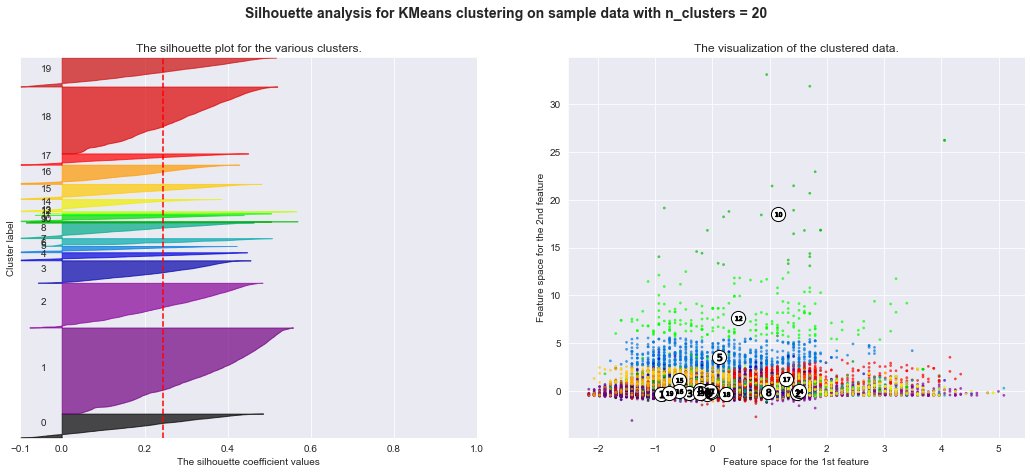

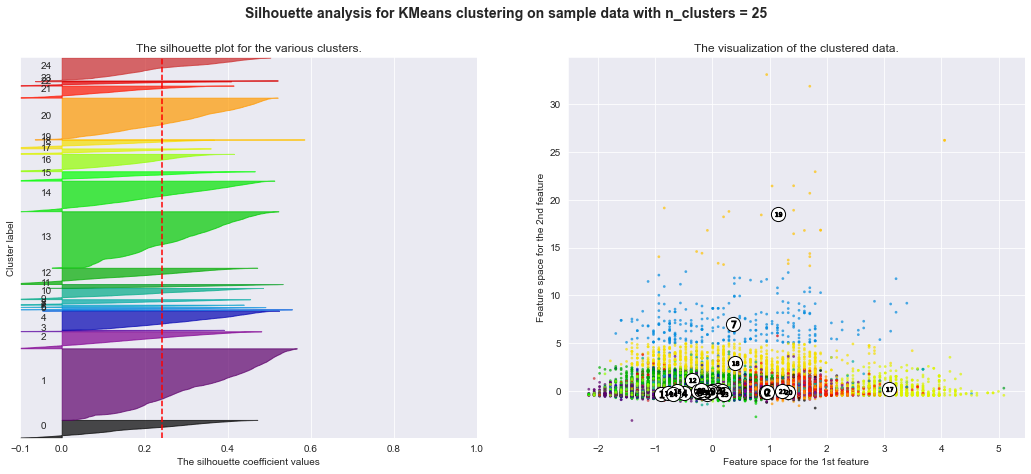

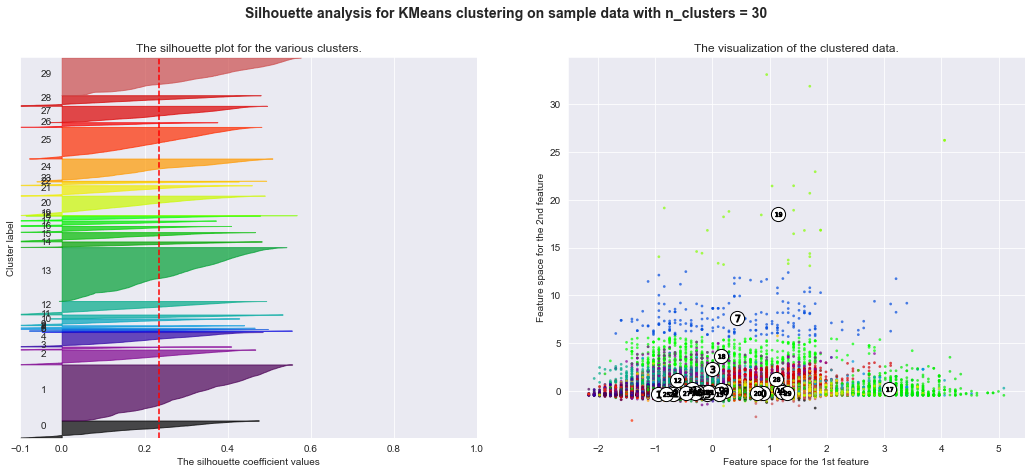

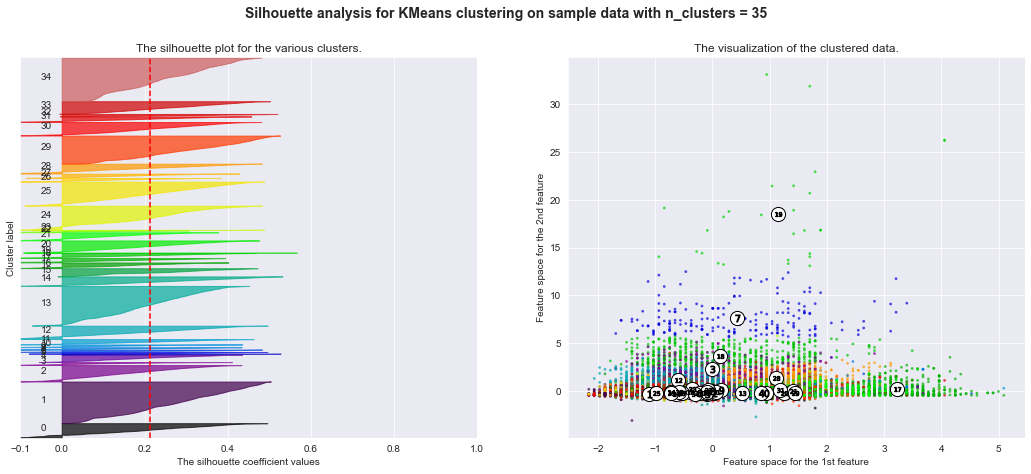

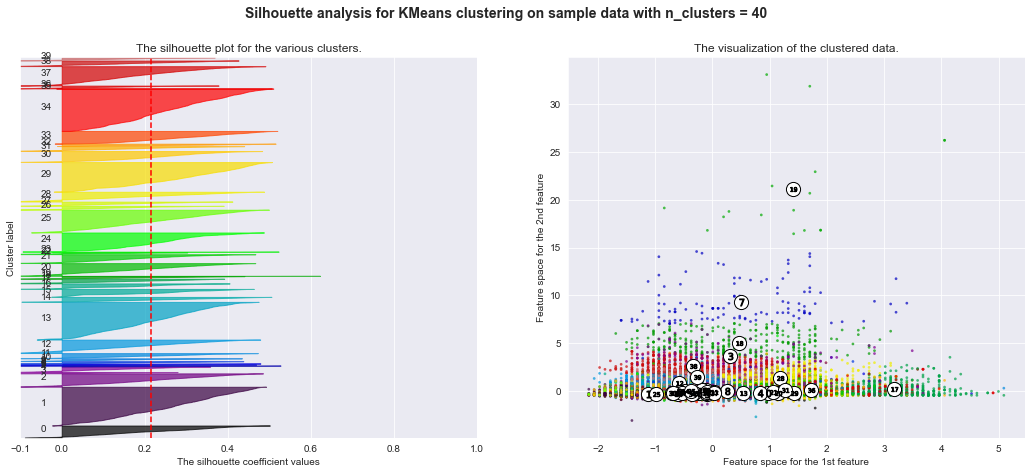

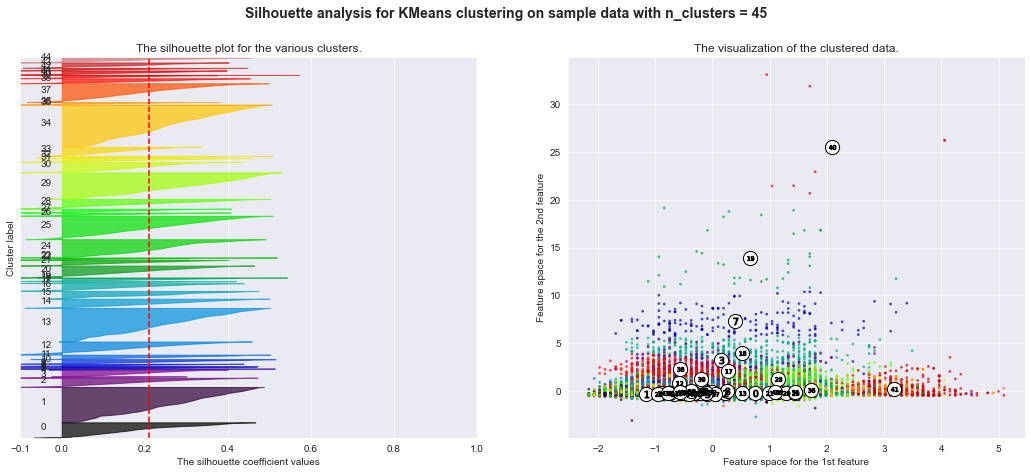

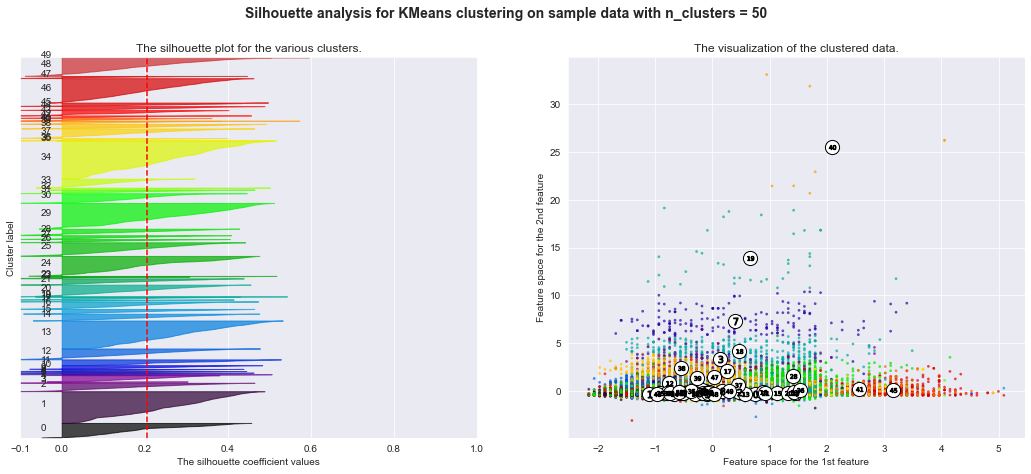

In [56]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
sil_list=[]
n_clusters_list=[]
inertia=[]
# Assuming your DataFrame is named 'data_transformed'
# If it's not already a NumPy array, you can convert it as follows:
X = df_norm.to_numpy()
range_n_clusters = [2, 3, 4, 5, 6,8,9,10,12,14,15,16,18,20,25,30,35,40,45,50]
#range_n_clusters = [2]
for n_clusters in range_n_clusters:
    # (The rest of the code remains unchanged)
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    sil_list.append(silhouette_avg)
    n_clusters_list.append(n_clusters)
    inertia.append(kmeans.inertia_)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()

In [ ]:
inertia_list
silhouette_list
k_list = []

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

In [31]:
# code here

How many clusters did you find?

*Answer here*

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [32]:
# code here

### Application: clustering images (Optional)

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [33]:
# install skimage

#Code here

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [34]:
# code here

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [35]:
# code here

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [36]:
# code here

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [37]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [38]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [39]:
# code here